**Step 1:** Load the Dataset from the Zip File
We will extract the dataset from the provided zip file, load it into a pandas DataFrame, and display its structure and the first few rows to understand the data.

In [8]:
import pandas as pd
import zipfile

def load_dataset(zip_file_path, csv_file_name):
    """
    Load a dataset from a zip file and display basic structure.

    Args:
        zip_file_path (str): Path to the zip file.
        csv_file_name (str): Name of the CSV file inside the zip.

    Returns:
        pd.DataFrame: The loaded dataset.
    """

    print("Extracting the zip file...")
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall("./data")  # Extracts all files to a folder named "data"

    # Step 2: Load the CSV file into a DataFrame
    print("Loading the dataset...")
    data = pd.read_csv(f"data/Amazon Customer Behavior Survey.csv")

    # Step 3: Display basic information about the dataset
    print("\nDataset Information:")
    print(data.info())

    print("\nFirst Five Rows of the Dataset:")
    print(data.head())

    return data

# Provide the zip file path and the CSV file name inside the zip
zip_file_path = "Amazon consumer Behaviour Dataset.zip"
csv_file_name = "Amazon Customer Behavior Survey.csv"

# Load the dataset
dataset = load_dataset(zip_file_path, csv_file_name)


Extracting the zip file...
Loading the dataset...

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Ad

**Step 2: Preprocessing the Dataset**

To move forward, we need to preprocess the dataset. This includes handling missing values, encoding categorical variables, and preparing the data for further analysis.

In [11]:
from sklearn.preprocessing import LabelEncoder

def preprocess_data(data):
    """
    Preprocess the dataset:
    - Handle missing values.
    - Encode categorical variables.

    Args:
        data (pd.DataFrame): The original dataset.

    Returns:
        pd.DataFrame: The processed dataset.
    """
    # Step 1: Handle missing values (if any)
    print("Checking for missing values before handling...")
    print(data.isnull().sum())

    # Fill missing values for categorical columns with mode
    for col in data.select_dtypes(include=['object']).columns:
        data[col].fillna(data[col].mode()[0], inplace=True)

    # Fill missing values for numerical columns with mean
    for col in data.select_dtypes(include=['float64', 'int64']).columns:
        data[col].fillna(data[col].mean(), inplace=True)

    print("Checking for missing values after handling...")
    print(data.isnull().sum())

    # Step 2: Encode categorical variables
    print("\nEncoding categorical variables...")
    label_encoders = {}
    for col in data.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le  # Save encoders for potential inverse transform

    # Step 3: Display the processed dataset
    print("\nProcessed Dataset Information:")
    print(data.info())
    print("\nFirst Five Rows of Processed Data:")
    print(data.head())

    return data, label_encoders

# Preprocess the dataset
processed_data, encoders = preprocess_data(dataset)

Checking for missing values before handling...
Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation         

C:\Users\gaura\AppData\Local\Temp\ipykernel_12164\1281919851.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
C:\Users\gaura\AppData\Local\Temp\ipykernel_12164\1281919851.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

**Step 3: Statistical Analysis**


Now that the dataset is preprocessed, the next step is to perform a statistical analysis. This will help understand the distribution, relationships, and patterns within the data before clustering.


Visualizing feature distributions...


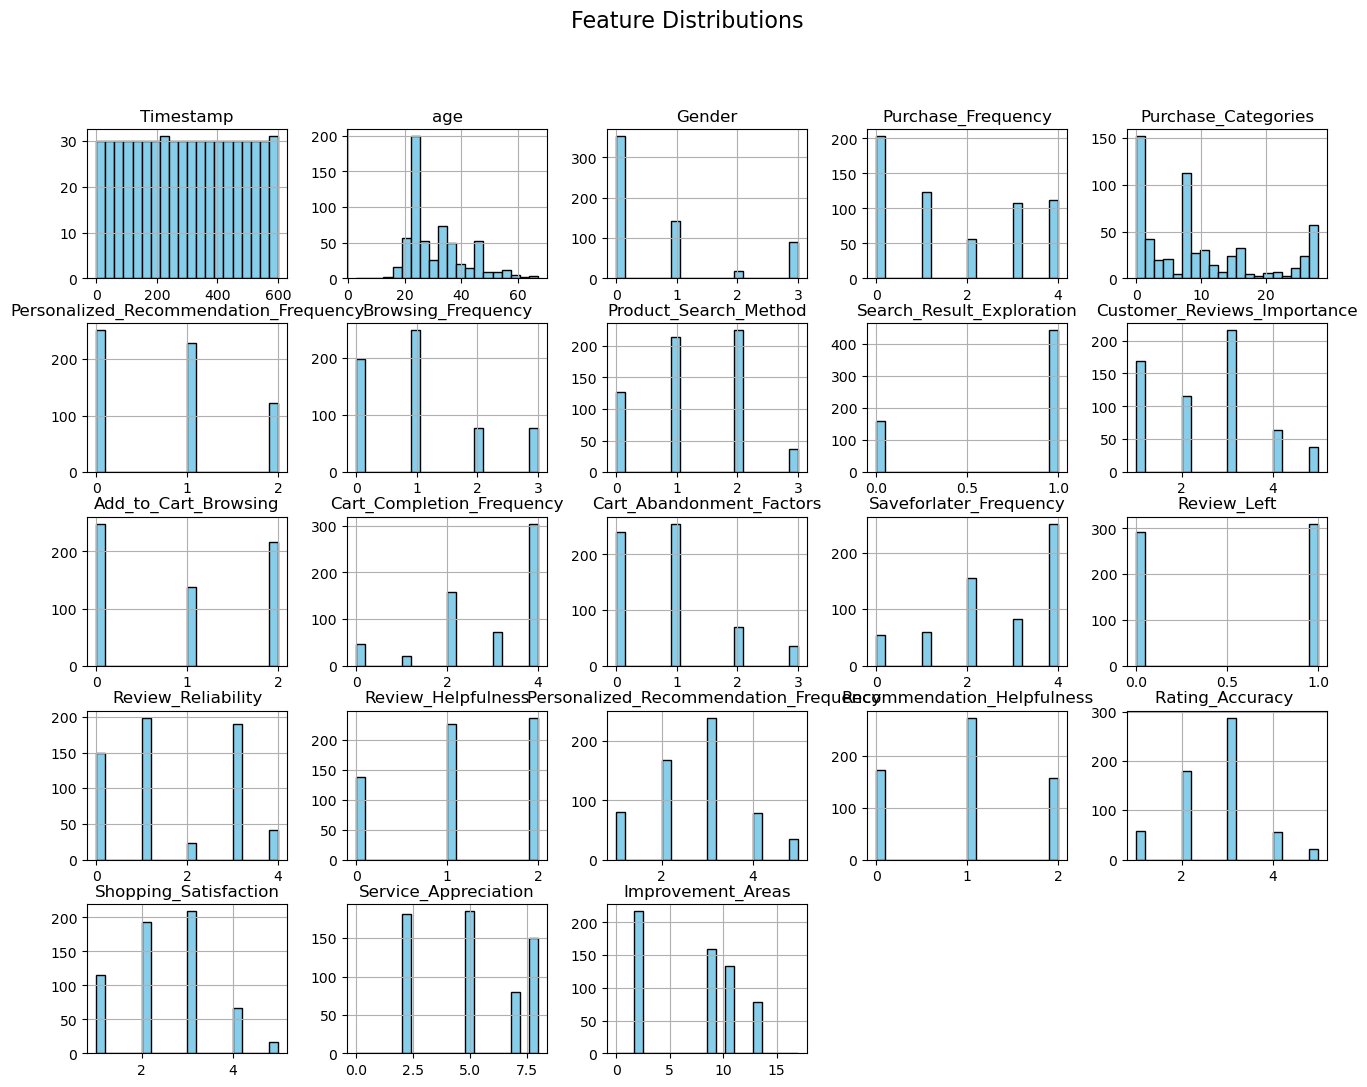


Creating a correlation heatmap...


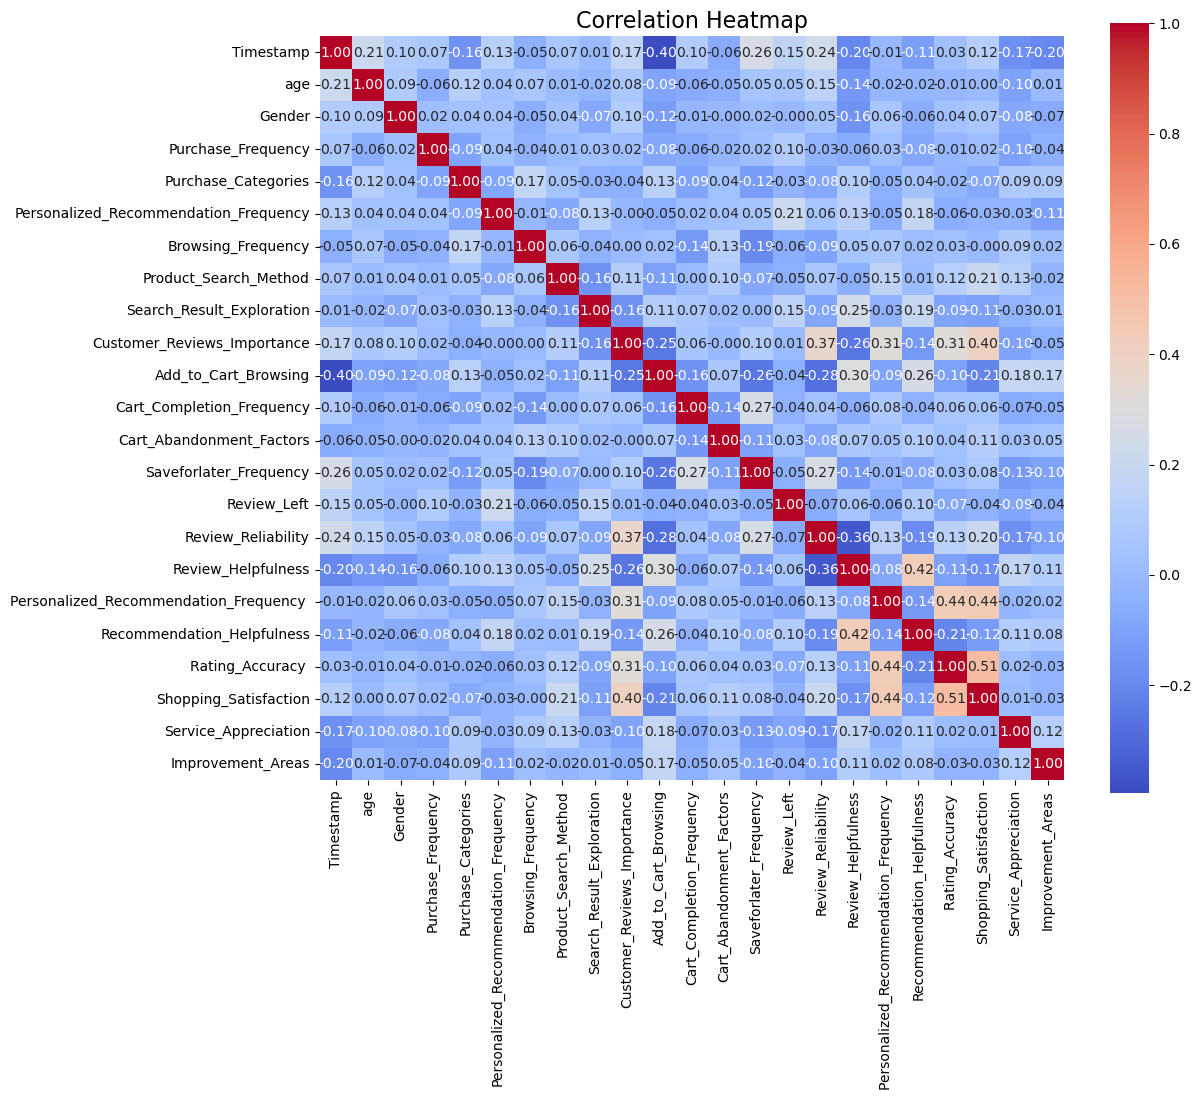

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

def perform_statistical_analysis(data):
    """
    Perform statistical analysis on the dataset:
    - Visualize distributions of features.
    - Create a correlation heatmap.

    Args:
        data (pd.DataFrame): The processed dataset.
    """
    # Step 1: Visualize feature distributions
    print("\nVisualizing feature distributions...")
    data.hist(figsize=(16, 12), bins=20, color='skyblue', edgecolor='black')
    plt.suptitle('Feature Distributions', fontsize=16)
    plt.show()

    # Step 2: Display correlation heatmap
    print("\nCreating a correlation heatmap...")
    correlation_matrix = data.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
    plt.title('Correlation Heatmap', fontsize=16)
    plt.show()

# Perform statistical analysis
perform_statistical_analysis(processed_data)

**Step 4:** Now Performing Clustering (K-Means)

C:\Users\gaura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\gaura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\gaura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\gaura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

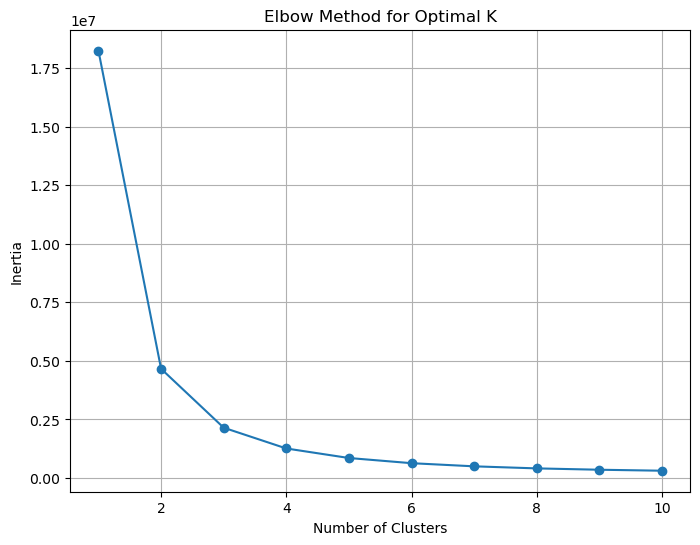

Clustered Data:
   Timestamp  age  Gender  Purchase_Frequency  Purchase_Categories  \
0          9   23       0                   0                    0   
1         10   23       0                   3                    8   
2         11   24       3                   0                   20   
3         12   24       0                   3                    4   
4         13   22       0                   1                    1   

   Personalized_Recommendation_Frequency  Browsing_Frequency  \
0                                      2                   1   
1                                      2                   0   
2                                      0                   0   
3                                      1                   0   
4                                      2                   0   

   Product_Search_Method  Search_Result_Exploration  \
0                      1                          1   
1                      1                          1   
2            

C:\Users\gaura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def perform_clustering(data, max_clusters=10):
    """
    Perform K-Means clustering and visualize the Elbow Method.

    Args:
        data (pd.DataFrame): Preprocessed dataset.
        max_clusters (int): Maximum number of clusters to test.

    Returns:
        pd.DataFrame: Dataset with cluster assignments.
        KMeans: Trained KMeans model.
    """
    # Step 1: Elbow Method
    inertia = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    # Plot the Elbow Method
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.title("Elbow Method for Optimal K")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid()
    plt.show()

    # Step 2: Fit KMeans with optimal clusters (e.g., k=4 for demonstration)
    optimal_k = 4  # Replace with the actual k chosen after analyzing the Elbow plot
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    data['Cluster'] = kmeans.fit_predict(data)

    return data, kmeans

# Call the function
clustered_data, kmeans_model = perform_clustering(processed_data)
print("Clustered Data:")
print(clustered_data.head())


**Step 5:** Now need to Analyze Clusters

Cluster Characteristics:
         Timestamp        age    Gender  Purchase_Frequency  \
Cluster                                                       
0            224.0  30.203947  0.618421            1.907895   
1            525.0  33.966887  0.827815            1.695364   
2             74.0  27.926174  0.523490            1.362416   
3            374.5  31.033333  1.000000            1.706667   

         Purchase_Categories  Personalized_Recommendation_Frequency  \
Cluster                                                               
0                   9.486842                               0.723684   
1                   7.251656                               0.900662   
2                  11.899329                               0.671141   
3                  10.300000                               0.846667   

         Browsing_Frequency  Product_Search_Method  Search_Result_Exploration  \
Cluster                                                                         
0      

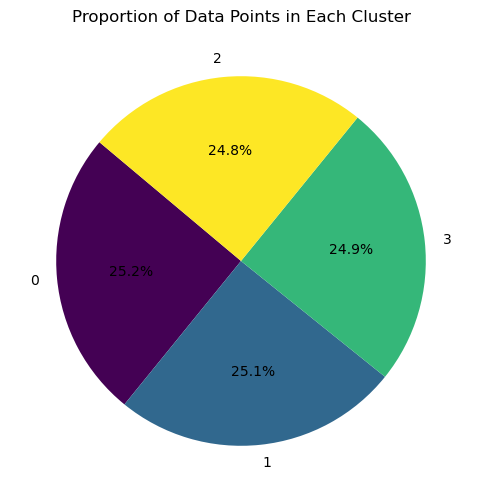

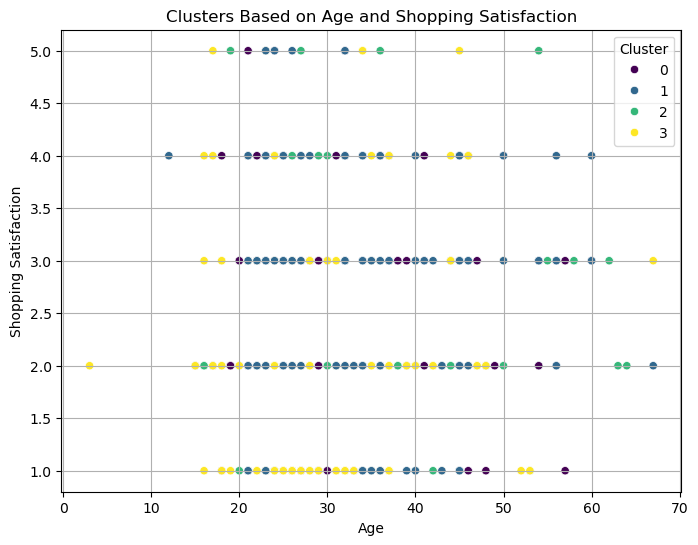

In [20]:
import seaborn as sns

def analyze_clusters(data):
    """
    Analyze the clusters by calculating feature means and visualizing distributions.

    Args:
        data (pd.DataFrame): Dataset with cluster assignments.

    Returns:
        None
    """
    # Step 1: Calculate Cluster Means
    cluster_means = data.groupby('Cluster').mean()
    print("Cluster Characteristics:")
    print(cluster_means)

    # Step 2: Visualize Cluster Proportions
    plt.figure(figsize=(6, 6))
    data['Cluster'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='viridis')
    plt.title("Proportion of Data Points in Each Cluster")
    plt.ylabel("")
    plt.show()

    # Step 3: Scatter Plot for Clusters
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='age', y='Shopping_Satisfaction', hue='Cluster', data=data, palette='viridis')
    plt.title("Clusters Based on Age and Shopping Satisfaction")
    plt.xlabel("Age")
    plt.ylabel("Shopping Satisfaction")
    plt.legend(title='Cluster')
    plt.grid()
    plt.show()

# Call the function
analyze_clusters(clustered_data)

**Step 6: Performing Linear Regression**

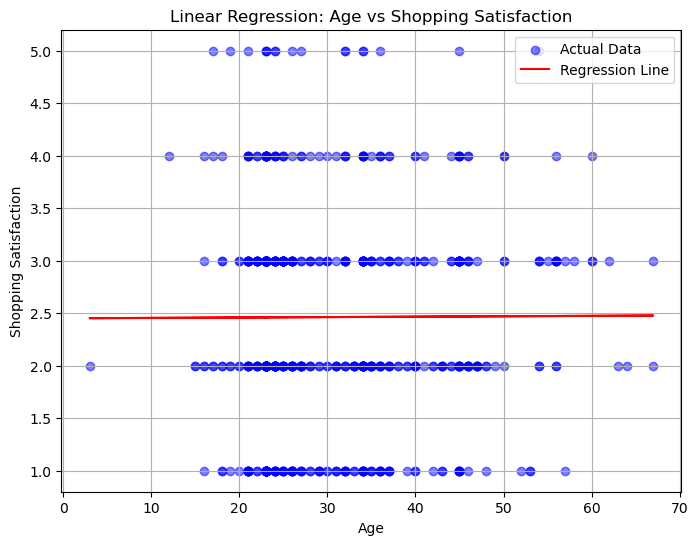

Intercept: 2.4514262879802833
Coefficient: 0.00039066544215954135


In [26]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data for regression
X = clustered_data[['age']]  # Independent variable
y = clustered_data['Shopping_Satisfaction']  # Dependent variable

# Create and train the regression model
regressor = LinearRegression()
regressor.fit(X, y)

# Predictions
y_pred = regressor.predict(X)

# Plot actual vs predicted data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title('Linear Regression: Age vs Shopping Satisfaction')
plt.xlabel('Age')
plt.ylabel('Shopping Satisfaction')
plt.legend()
plt.grid(True)
plt.show()

# Print regression coefficients
print(f"Intercept: {regressor.intercept_}")
print(f"Coefficient: {regressor.coef_[0]}")

**Step 7: Future Predictions**

C:\Users\gaura\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


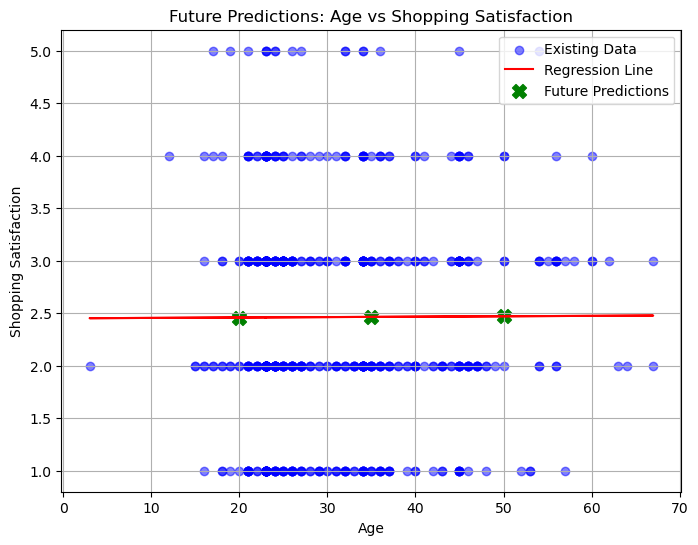

Predicted Shopping Satisfaction for Age 20: 2.459239596823474
Predicted Shopping Satisfaction for Age 35: 2.465099578455867
Predicted Shopping Satisfaction for Age 50: 2.4709595600882603


In [37]:
# Define future ages
future_ages = np.array([20, 35, 50]).reshape(-1, 1)

# Predict shopping satisfaction for future ages
future_predictions = regressor.predict(future_ages)

# Plot predictions
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Existing Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.scatter(future_ages, future_predictions, color='green', s=100, label='Future Predictions', marker='X')
plt.title('Future Predictions: Age vs Shopping Satisfaction')
plt.xlabel('Age')
plt.ylabel('Shopping Satisfaction')
plt.legend()
plt.grid(True)
plt.show()

# Print future predictions
for age, prediction in zip(future_ages.flatten(), future_predictions):
    print(f"Predicted Shopping Satisfaction for Age {age}: {prediction}")

**The End**